In [1]:
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics


In [61]:
x=np.loadtxt('/home/ankita/Desktop/data/wine.txt',dtype='float',delimiter=',',usecols = list(range(1,14)))
labels=np.loadtxt('/home/ankita/Desktop/data/wine.txt',dtype='int',delimiter=',',usecols = (0,))

In [63]:
x.shape

(178, 13)

In [35]:
kmeans_bare = KMeans(n_clusters=3,init='random', random_state=None,max_iter=100).fit(x)


In [36]:
#ss_bare = metrics.silhouette_score(x, kmeans_bare.labels_, metric='euclidean', sample_size=None,random_state=None)
#ri_bare = metrics.adjusted_rand_score(kmeans_bare.labels_,labels)
nmi_bare = metrics.normalized_mutual_info_score(kmeans_bare.labels_,labels)

In [37]:
#ss_bare, ri_bare,
nmi_bare

0.42875686335053043

In [38]:
def randindex(labels1,labels2):
    tp,tn,fp,fn = 0.0,0.0,0.0,0.0
    for point1 in range(len(labels1)):
        for point2 in range(len(labels1)):
            tp += 1 if labels1[point1] == labels1[point2] and labels2[point1] == labels2[point2] else 0
            tn += 1 if labels1[point1] != labels1[point2] and labels2[point1] != labels2[point2] else 0
            fp += 1 if labels1[point1] != labels1[point2] and labels2[point1] == labels2[point2] else 0
            fn += 1 if labels1[point1] == labels1[point2] and labels2[point1] != labels2[point2] else 0
    return (tp+tn) /(tp+tn+fp+fn)
randindex(kmeans_bare.labels_,labels)

0.720237343769726

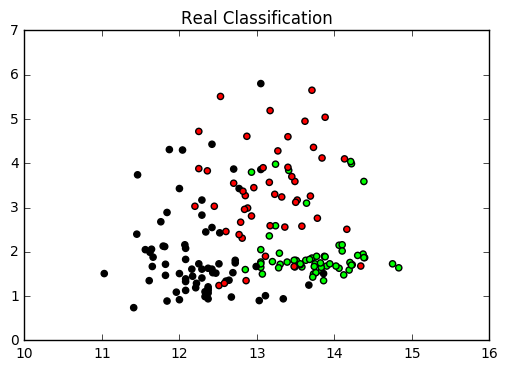

In [64]:
%matplotlib inline
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

x1 = x[:,0]
y = x[:,1]
colormap = np.array(['red', 'lime', 'black','red'])

plt.scatter(x1, y, c=colormap[labels])
plt.title('Real Classification')
plt.show()


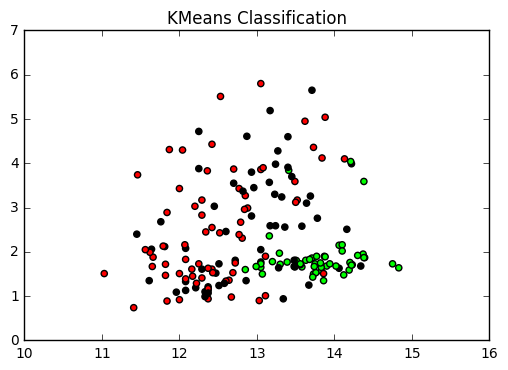

In [66]:
x1 = x[:,0]
y = x[:,1]
colormap = np.array(['red', 'lime', 'black','red'])

plt.scatter(x1, y, c=colormap[kmeans_bare.labels_])
plt.title('KMeans Classification')
plt.show()